## <center>Project 5: Image Identification using Artificial Neural Network (ANN) and Convolution Neural Network (CNN)</center>

**Name: Doungporn Wiwatanapataphee**<br>
**Date created:** 27 April 2021<br>

### Contents

1. [Data Preparation and Visualisation](#1) <br>
2. [Multi-Layer Perceptron (MLP)](#2) <br>
    2.1 [Hyperparameters](#2.1) <br>
    2.2 [Architecture](#2.2) <br>
    2.3 [Training and Testing](#2.3) <br>
    2.4 [Classification Results](#2.4) <br>
3. [Convolution Neural Network (CNN)](#3) <br>
    3.1 [Hyperparameters](#3.1) <br>
    3.2 [Architecture](#3.2) <br>
    3.3 [Training and Testing](#3.3) <br>
    3.4 [Classification Results](#3.4) <br>
4. [Comparison & Summary](#4) <br>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# tensorflow 
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Common imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# Enabling and testing the GPU with tensorflow
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### 1. Data Preparation and Visualisation <a class="anchor" id="1"></a>

For this lab, we will be using the CIFAR-10 dataset containing 60000  32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images divided into five training batches (data_batch_1, data_batch_2, data_batch_3, data_batch_4 and data_batch_5), and 10000 randomly-selected test images from each class stored in a test_batch.

The objective of this lab is to train an MLP and a CNN for the classification task to predict a label (class) for the given instance (image) and compare their performance. These 10 classes we would like to classified are:

- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

In this section, we firstly use the `load_batch` function from the `DataLoader` class to load the data from training and test batch files. Then, the training set are randomly splited into training (80%) and validation (20%) set using the `train_test_split()` function from `sklearn.model_selection`.

For visualisation, the function `plot_sampled_images` is defined to display 20 randomly sampled images from the data. The function takes 2 arguments: 

- `X` for the numpy array containing 32x32 colour image and 
- `y` for the list of integer labels in the range of 0 to 9.

To get a counter and the value from the iterable in a plotting loop, a function `enumerate()` is employed with an argument `np.random.choice(X.shape[0], size=20, replace=False)`. This will essentially give us a counter of size 20 (0-19) together with a randomly sampled (without replacement) index from a given array.

Then, a function `imshow()` is used to display array data as an image. At this point, a function `squeeze()` is also used to remove axes of length one from a given array.

In order to display the corresponding class name of each image, a function `set_title()` is employed with an argument `class_names[true_idx]`. It is noted that the list of image classes in the dataset is stored in a list called `class_names`. By selecting a class name corresponding to the selected integer label from `y`, we are able to correctly set the image title by its class name.

Once the function is defined, it is called three times for the training, test, and validation set.

The code to perform the tasks are shown as follows: 

#### Step 1: Import the `DataLoader` class and call the `load_batch` function

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/lab05/

/content/drive/My Drive/lab05


In [ ]:
from data_loader import DataLoader

In [ ]:
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
X_train, y_train = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

#### Step 2. A quick inspection of the outputs from the `load_batch` function

In [ ]:
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


#### Step 3. Training and validation set split

In [ ]:
# Training and Validation Split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
print('X_train.shape =', X_train.shape, 'data type:', X_train.dtype)
print('y_train.shape =', y_train.shape, 'data type:', y_train.dtype)

X_train.shape = (40000, 32, 32, 3) data type: float32
y_train.shape = (40000,) data type: uint8


In [ ]:
print('X_val.shape =', X_val.shape, 'data type:', X_val.dtype)
print('y_val.shape =', y_val.shape, 'data type:', y_val.dtype)

X_val.shape = (10000, 32, 32, 3) data type: float32
y_val.shape = (10000,) data type: uint8


#### Step 4. Visualisation

In [ ]:
def plot_sampled_images(X, y):
    fig = plt.figure(figsize = (20, 4))
    for i, idx in enumerate(np.random.choice(X.shape[0], size=20, replace=False)):
        ax = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X[idx]))
        true_idx = y[idx]
        ax.set_title(class_names[true_idx])

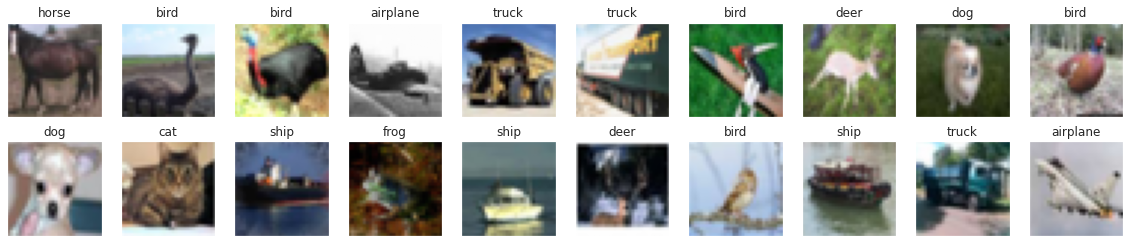

In [ ]:
# Training set
plot_sampled_images(X_train, y_train)

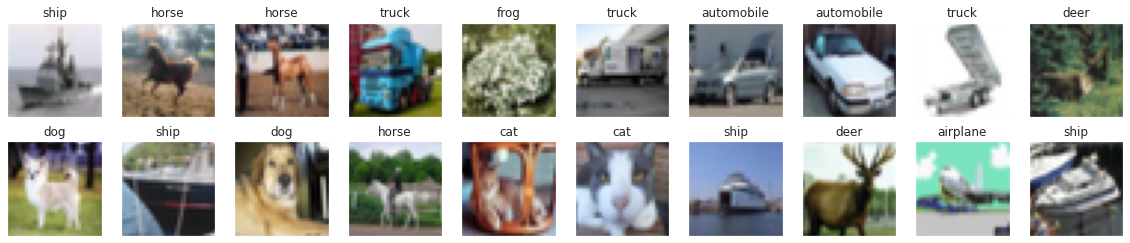

In [ ]:
# Test set
plot_sampled_images(X_test, y_test)

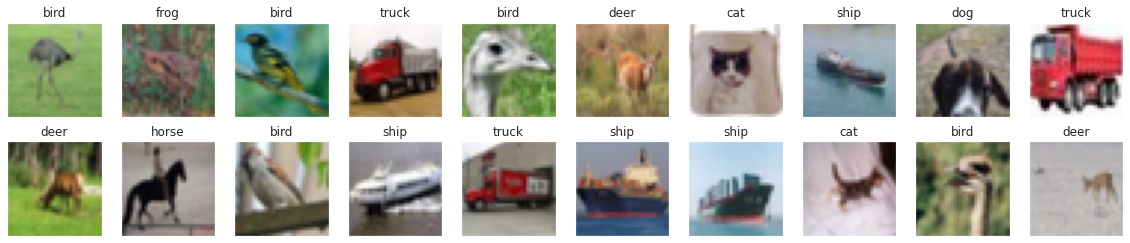

In [ ]:
# Validation set
plot_sampled_images(X_val, y_val)

### 2. Multi-Layer Perceptron (MLP) <a class="anchor" id="2"></a>

#### 2.1 Hyperparameters <a class="anchor" id="2.1"></a>

In this section, we will experiment using grid searching and early stopping to determine the best settings for MLP network. Experiments will perform on two possible settings for the following:

- connection weight initialisation;
- learning rate scheduling;
- dropout rate.

By default, a Dense hidden layer initialised the connection weights randomly. If we want to use a different initialisation method, we can manually set the `kernel_initializer` argument to the strategy we require. For the CIFAR-10 data, we will try building MLP using

- `LeCun` initialisation with `SELU` activation function, and
- `He` initialisation with `eLU` activation function.

Secondly, power scheduling will be used for learning rate scheduling. This can be done by specifying a gradient descent optimizer with `lr` (learning rate) and `decay` arguments. The keras' `decay` is essentially the same as 1/s in the formula

$$\eta(t)=\frac{\eta_0}{(1+t/s)^c},$$

assuming that c is equal to 1.

Therefore, we will perform grid searching on parameters:

- `lr` for learning rate of 0.01 and 0.001, and
- `s` for number of steps of 1e+4 and 1e+5. 

Thirdly, Dropout layer is applied for each of the hidden layers with a frequency of `rate`. By default, the rate parameter is set to 0.5, so we will try using the rate of 0.2 as well.

In order to effectively perform hyperparameters tuning, a function called `build_MLP()` is defined to sequentially build and compile the model. It has 5 arguments- namely, `activation_func`, `kernel_init`, `lr`, `s`, and `dropout_rate`. Each of these corresponds to the hyperparameter we want to investigate. Then, `KerasClassifer` and `GridSearchCV` are employed to perform grid searching on these hyperparameters with the following possible values:

- `activation_func = ['selu', 'elu']`
- `kernel_init = ['lecun_normal', 'he_normal']`
- `lr = [0.01, 0.001]`
- `s = [1e+4, 1e+5]`
- `dropout_rate = [0.2, 0.5]`

Since grid searching is computational expensive, the code for hyperparameter tuning process has been commented out.

Best combination of hyperparameters obtained from grid searching is

- `activation='elu'`
- `kernel_initialisation='he_normal'`
- `rate='0.5' # dropout rate`
- `lr='0.01' # learning rate`
- `s='10000' # steps`


In [ ]:
# function to build MLP network with 2 hidden layers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

def build_MLP(activation_func, kernel_init, dropout_rate, lr, s):
  # build sequential api model
  model = Sequential()
  # flatten input data
  model.add(Flatten(input_shape=[32, 32, 3]))
  # add 2 hidden layers with dropout
  model.add(Dense(256, activation=activation_func, kernel_initializer=kernel_init))
  model.add(Dropout(dropout_rate))
  model.add(Dense(128, activation=activation_func, kernel_initializer=kernel_init))
  model.add(Dropout(dropout_rate))
  # output layer
  model.add(Dense(10, activation='softmax'))
  # power scheduling learning rate
  optimizer = keras.optimizers.SGD(lr=lr, decay=1/s)
  # compile model
  model.compile(loss='categorical_crossentropy', 
                optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
# # Perform grid search for best combination of hyperparamenters
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# # Parameter grid for lecun_normal kernel initialiser and selu activation function
# activation_func = ['selu']
# kernel_init = ['lecun_normal']
# dropout_rate = [0.2, 0.5]
# lr = [0.01, 0.001]
# s = [1e+4, 1e+5]
# param_grid = dict(activation_func=activation_func,
#                   kernel_init=kernel_init,
#                   dropout_rate=dropout_rate,
#                   lr=lr,
#                   s=s)

# model = KerasClassifier(build_fn=build_MLP, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train)

In [ ]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.307324 using {'activation_func': 'selu', 'dropout_rate': 0.5, 'kernel_init': 'lecun_normal', 'lr': 0.01, 's': 10000.0}


In [ ]:
# # Parameter grid for he_normal kernel initialiser and elu activation function
# activation_func = ['elu']
# kernel_init = ['he_normal']
# param_grid = dict(activation_func=activation_func,
#                   kernel_init=kernel_init,
#                   dropout_rate=dropout_rate,
#                   lr=lr,
#                   s=s)

# model = KerasClassifier(build_fn=build_MLP, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train)

In [ ]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.309525 using {'activation_func': 'elu', 'dropout_rate': 0.5, 'kernel_init': 'he_normal', 'lr': 0.01, 's': 10000.0}


#### 2.2 Architecture <a class="anchor" id="2.2"></a>

In this section, the MLP with two hidden layers are built. Since the dataset is composed of 32$ \times $32 pixel colour images with 3 RGB image channels and 10 classes, it will require a total of 32$ \times $32$ \times $3 $=$ 3072 input neurons and 10 output neurons. 

The number of neurons used for the two hidden layers are 256 and 218, respectively. The idea is to size the number of neurons to form a pyramid, with fewer and fewer neurons at each layer. However, we don't want the number of neurons to be too high as we might encounter an overfitting problem.

For both hidden layers, we use He initialisation with ELU activation function as suggested by grid searching in the previous section.

Lastly, the softmax function is used as the activation function in the output layer of the network.

The code to perform network building and the summary of the model is shown as follows:

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# build sequential api
model1 = Sequential()

# flatten input data
model1.add(Flatten(input_shape=[32, 32, 3]))

# add 2 hidden layers with dropout
model1.add(Dense(256, activation='elu', kernel_initializer='he_normal'))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='elu', kernel_initializer='he_normal'))
model1.add(Dropout(0.5))

# output layer
model1.add(Dense(10, activation='softmax'))

# model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
__________________________________________________

From the summary of the model, we notice the following:

- All the dense layers have quite a lot of parameters, which gives us a lot of flexibility.
- The first hidden layer has a total of 3072 $\times$ 256 + 256 = 786688 parameters.
- The second hidden layer has a total of 256 $\times$ 128 + 128 = 32896 parameters.
- The output layer has a total of 128 $\times$ 10 + 10 = 1290 parameters.
- Since the total number of parameters is quite high, we might run into an overfitting problem. In the later section, we will evaluate the model to see whether that is the case.

#### 2.3 Training and Testing <a class="anchor" id="2.3"></a>

In this section, we firstly compile the network with three arguments:

- `loss`: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training. For a classification task with many integer-labelled classes, we usually prefer the `"sparse_categorical_crossentropy"` loss, which essentially computes the crossentropy loss between the labels and predictions.
- `optimizer`: Since we are using power scheduling learning rate, the Gradient descent optimizer is initialised (with learning rate and decay obtained from grid searching) before passing it to `model.compile()`.
- `metrics`: The argument specifies the list of metrics to be evaluated by the model during training and testing. For this dataset, we use `'accuracy'`.

Before we fit the network, we make use of `ModelCheckpoint` callback with the second argument `save_best_only=True` in order to save the best model to folder specified in the first argument.

In addition, `EarlyStopping` callback  with argument `patience=10` is employed to interupt the training when it measures no progress on the validation set for 10 epochs and roll back to the best model.

By setting up said callbacks, we can optimise time and resource in training a large network.

Then, we train the network model using `fit()` function with training data, validation data, callbacks and number of epochs.

The following code cell makes use of if-else statement in order to determine whether the best model has been saved to the directory. If the path to said directory exists, the saved model is loaded and trained for one more epoch before evaluating the model on the validation set. If the path does not exist, the network will be compiled as described above.


In [ ]:
# Check whether the checkpoint directory exists 
if os.path.exists("Wiwatanapataphee_Doungporn_MLP"):
  # loading the saved model
  model1 = keras.models.load_model("Wiwatanapataphee_Doungporn_MLP")
  # train for one more epoch
  model1.fit(X_train, y_train, epochs=1,
            validation_data=(X_val, y_val), verbose=0)
  model1.evaluate(X_val, y_val)
else: # if not exists, train the model from scratch
  # power scheduling by SGD optimizer
  optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)
  model1.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
  # Using callbacks for early stopping and checkpoint
  early1_stopping_cb = EarlyStopping(patience=10)
  model1_checkpoint_cb = ModelCheckpoint("Wiwatanapataphee_Doungporn_MLP",
                                          save_best_only=True)
  callbacks1 = [early1_stopping_cb, model1_checkpoint_cb]
  # fit the model
  model1.fit(X_train, y_train, epochs=100,
            validation_data=(X_val, y_val),
            callbacks=callbacks1, verbose=0)

313/313 [==============================] - 1s 3ms/step - loss: 1.5783 - accuracy: 0.4363


Since `ModelCheckpoint` callback is employed, we can simply load the best model using the function `load_model` with the path argument (if exists). Then, we train the model for one more epoch and evaluate the model by passing the validation data to the `evaluate` function. The validation loss and accuracy are shown above.

#### 2.4 Classifiction Results <a class="anchor" id="2.4"></a>

In this section, we make use of `confusion_matrix` and `classification_report` from `skylearn.metrics` in order to graphically visualise confusion matrix and return classification accuracy and F1 score for the test set. In addition, a function called `plot_pred_result` is defined with three arguments: `X_test`, `y_test`, and `y_pred`, in order to plot 20 randomly selected classified images.

The explanation and discussion of the results will be given at the end of this section.

In [ ]:
# evaluate model on the training data
model1.evaluate(X_train, y_train)

1250/1250 [==============================] - 5s 4ms/step - loss: 1.5309 - accuracy: 0.4578


[1.530867576599121, 0.4578250050544739]

In [ ]:
# evaluate model on the validation data
model1.evaluate(X_val, y_val)

313/313 [==============================] - 1s 3ms/step - loss: 1.5783 - accuracy: 0.4363


[1.5783357620239258, 0.43630000948905945]

In [ ]:
# evaluate model on the test data
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5720 - accuracy: 0.4392


[1.571990728378296, 0.4392000138759613]

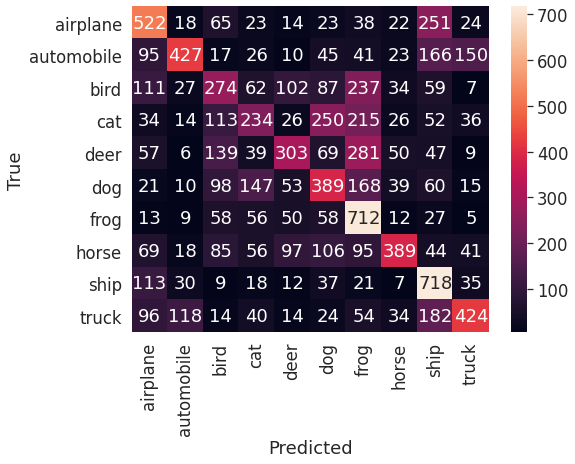

In [ ]:
from sklearn.metrics import confusion_matrix

# predict
y_pred = model1.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = y_test
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names,
            annot=True, fmt="d");
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show();

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true_labels, y_pred_labels,
                            target_names=class_names, digits=4))

              precision    recall  f1-score   support

    airplane     0.4615    0.5220    0.4899      1000
  automobile     0.6307    0.4270    0.5092      1000
        bird     0.3142    0.2740    0.2927      1000
         cat     0.3338    0.2340    0.2751      1000
        deer     0.4449    0.3030    0.3605      1000
         dog     0.3575    0.3890    0.3726      1000
        frog     0.3824    0.7120    0.4976      1000
       horse     0.6116    0.3890    0.4756      1000
        ship     0.4471    0.7180    0.5510      1000
       truck     0.5684    0.4240    0.4857      1000

    accuracy                         0.4392     10000
   macro avg     0.4552    0.4392    0.4310     10000
weighted avg     0.4552    0.4392    0.4310     10000



In [ ]:
def plot_pred_result(X_test, y_test, y_pred):
    fig = plt.figure(figsize = (16, 8))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = y_test[idx]
        # green title for right prediction, otherwise red title.
        # predicted label is stated first, and then
        # ground truth is stated inside parenthesis
        ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

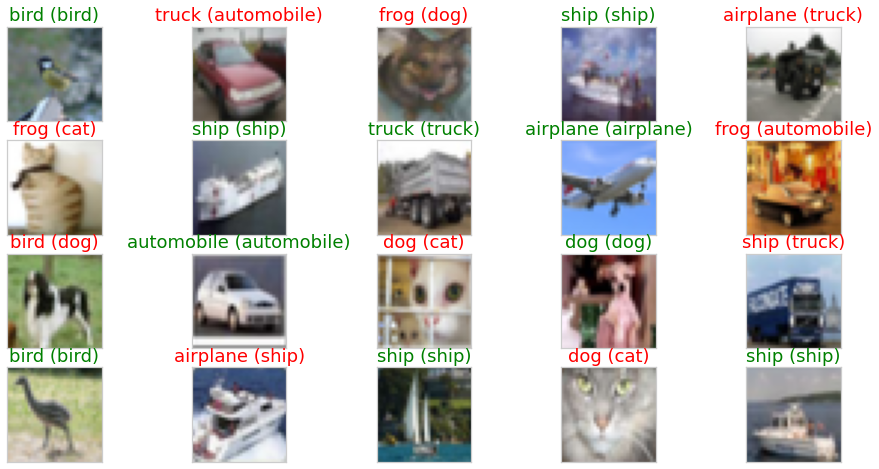

In [ ]:
np.random.seed(42)
plot_pred_result(X_test, y_test, y_pred)

In the previous section, we made a statement that the total number of parameters is quite high, which might results in an overfitting problem. We can assess whether there is a problem by investigating the training, test, and validation errors. Since the training error is not so far off from the test and validation errors, it is safe to say that the MLP network is not overfitting.

From the confusion matrix and classification report, we notice the following:

- The confusion matrix looks quite acceptable, as we observe big number along the main diagonal. This suggests the classification performance is fairly well.
- It is noticeable that the MLP performs significantly worse in prediction of most animal classes than frog and vehicle classes.
- Animals are usually mistaken for another types of animal. Similarly, vehicles are usually mistaken for another types of vehicles.
- Both the classification accuracy and F1 score are about 43%. This can be improved by adding batch normalisation.
- The F1 score of animal classes are noticeable lower than vehicle classes, which is expected.

Now, let's have a look at some of the classification results predicted by the MLP network. The above visualisation shows 20 randomly selected images with predicted label and true label specified on top of each image. The correctly classified will be in green, whereas the wrongly classified will be in red.

It is noted that the objects within classes in this dataset can be extremely varied. For instance, the animal classes contain many different species, poses, and angles, which results in a high number of incorrectly classified between them.

### 3. Convolution Neural Network (CNN) <a class="anchor" id="3"></a>

#### 3.1 Hyperparameters <a class="anchor" id="3.1"></a>

In this section, we will experiment using grid searching and early stopping to determine the best settings for CNN. Experiments will perform on two possible settings for the following:

- kernel size;
- number of kernels;
- activation function.

Firstly, the kernel size (`kernel_size`) is an integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution filter. A common strategy is to have large kernel for the first convolution layer, and then smaller kernel for the consecutive layers. We will perform grid searching on the kernel size of the first layer (`init_kernel_size`) for the size of 7x7 and 5x5, and then reduce the dimension of the kernel size by 2 as we move to the next layer.

Secondly, the number of kernels (`filters`) is an integer, specifying the number of output filers in the convolution. The number of kernels is chosen based on complexity of the task. Usually, we will start with a small number of kernels in the first layer and double the number as we move along to the next layer. We will try starting with 32 or 64 kernels.

Thirdly, the activation function of convolution layers (`activation`). Usually, `'relu'` activation function is preferred for CNN. However, the LeNet-5 archutecture suggests that `'tanh'` might be another interesting option. Therefore, we will try grid seaching on both `'relu'` and `'tanh'` activation functions.

In order to effectively perform hyperparameters tuning, a function called `build_CNN()` is defined to sequentially build and compile the model. It has 3 arguments- namely, `init_kernel_size` `init_no_kernels`, and `activation_func`. Each of these corresponds to the hyperparameter we want to investigate. Again, `KerasClassifer` and `GridSearchCV` are employed to perform grid searching on these hyperparameters with the following possible values:

- `init_kernel_size = [7, 5]`
- `init_no_kernels = [32, 64]`
- `activation_func = ['relu', 'tanh']`

Since grid searching is computational expensive, the code for hyperparameter tuning process has been commented out.

Best combination of hyperparameters obtained from grid searching is

- `activation_func = 'relu'`
- `init_kernel_size = 5`
- `init_no_kernels = 64`


In [ ]:
# function to build CNN with 3 convolution layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
def build_CNN(init_no_kernels, init_kernel_size, activation_func):
  # create sequential api
  model = Sequential()
  # convolutional input layer
  model.add(Conv2D(init_no_kernels, init_kernel_size, input_shape=(32, 32, 3), activation=activation_func, padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(2))
  # second and third convolutional layers
  model.add(Conv2D(init_no_kernels * 2, init_kernel_size - 2, activation=activation_func, padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(init_no_kernels * 2, init_kernel_size - 2, activation=activation_func, padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(2))
  model.add(Dropout(0.2))
  # 1 fully connected layer
  model.add(Flatten())
  model.add(Dense(init_no_kernels, activation=activation_func))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  # output layer
  model.add(Dense(10, activation='softmax'))
  # power scheduling learning rate
  optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)
  # compile
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
  return model

In [ ]:
# # Perform grid search for best combination of hyperparamenters
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# # Parameter grid
# init_kernel_size = [7, 5]
# init_no_kernels = [32, 64]
# activation_func = ['relu', 'tanh']

# param_grid = dict(init_kernel_size=init_kernel_size,
#                   init_no_kernels=init_no_kernels,
#                   activation_func=activation_func)

# model = KerasClassifier(build_fn=build_CNN, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train)

In [ ]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.474475 using {'activation_func': 'relu', 'init_kernel_size': 5, 'init_no_kernels': 64}


#### 3.2 Architecture <a class="anchor" id="3.2"></a>

In this section, the CNN with three convolutional layers and one fully connected layer is built using the number of kernels, kernel size, and activation function as suggested by grid searching result from the previous section.

- The first convolutional layer is added with `input_shape=(32,32,3)`, which means the images are 32x32 pixels with RGB colour channel. We then, introduce batch normalisation and max pooling layers, which divides each spatial dimension by a factor of two (since `pool_size=2`).

- The second and third convolutional layers are added using double the number of filters and smaller kernel size. Batch normalisation layer is also added right after each layer to overcome the vanishing/exploading gradients problems.

- Then, max pooling and dropout layers with the rate of 0.2 are also applied after the third convolutional layer to reduce overfitting while preserving enough information. 

- After the third convulational layer, we then add fully connected network of one dense layer and output layer. It is noted that, the softmax function is used as the activation function in the output layer of the network.

- We also add batch normalisation and dropout layer with the rate of 0.2 to further reduce overfitting.

The code to perform network building and the summary of the model is shown as follows:

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# create sequential api
model2 = Sequential()

# convolutional input layer
model2.add(Conv2D(64, 5, input_shape=(32, 32, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2))

# second and third convolutional layers
model2.add(Conv2D(128, 3, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, 3, activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2))
model2.add(Dropout(0.2))

# 1 fully connected layer
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

# output layer
model2.add(Dense(10, activation='softmax'))

# summary
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       5

#### 3.3 Training and Testing <a class="anchor" id="3.3"></a>

In this section, we firstly compile the network with three arguments, similar to what we have done for the MLP.

- `loss`: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training. For a classification task with many integer-labelled classes, we usually prefer the `"sparse_categorical_crossentropy"` loss, which essentially computes the crossentropy loss between the labels and predictions.
- `optimizer`: Since we are using power scheduling learning rate, the Gradient descent optimizer is initialised (with learning rate and decay obtained from grid searching) before passing it to `model.compile()`.
- `metrics`: The argument specifies the list of metrics to be evaluated by the model during training and testing. For this dataset, we use `'accuracy'`.

Before we fit the network, we make use of `ModelCheckpoint` callback with the second argument `save_best_only=True` in order to save the best model to folder specified in the first argument.

In addition, `EarlyStopping` callback  with argument `patience=10` is employed to interupt the training when it measures no progress on the validation set for 10 epochs and roll back to the best model.

By setting up said callbacks, we can optimise time and resource in training a large network.

Then, we train the network model using `fit()` function with training data, validation data, callbacks and number of epochs.

Again, the following code cell makes use of if-else statement in order to determine whether the best model has been saved to the directory. If the path to said directory exists, the saved model is loaded and trained for one more epoch before evaluating the model on the validation set. If the path does not exist, the model will be compiled as described above.


In [ ]:
# Check whether the checkpoint directory exists 
if os.path.exists("Wiwatanapataphee_Doungporn_CNN"):
  # loading the saved model
  model2 = keras.models.load_model("Wiwatanapataphee_Doungporn_CNN")
  # train for one more epoch
  model2.fit(X_train, y_train, epochs=1,
            validation_data=(X_val, y_val), verbose=0)
  model2.evaluate(X_val, y_val)
else: # if not exists, train the model from scratch
  # power scheduling by SGD optimizer
  optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)
  model2.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
  # Using callbacks for early stopping and checkpoint
  early2_stopping_cb = EarlyStopping(patience=10)
  model2_checkpoint_cb = ModelCheckpoint("Wiwatanapataphee_Doungporn_CNN",
                                          save_best_only=True)
  callbacks2 = [early2_stopping_cb, model2_checkpoint_cb]
  # fit the model
  model2.fit(X_train, y_train, epochs=100,
            validation_data=(X_val, y_val),
            callbacks=callbacks2, verbose=0)

313/313 [==============================] - 27s 85ms/step - loss: 0.9324 - accuracy: 0.6958


#### 3.4 Classifiction Results <a class="anchor" id="3.4"></a>

In this section, we make use of `confusion_matrix` and `classification_report` from `skylearn.metrics` in order to graphically visualise confusion matrix and return classification accuracy and F1 score for the test set. 

We also make use of `plot_pred_result` function defined in the MLP section to plot 20 randomly selected classified images. Since we have set the seed number using `np.random.seed(42)`, all the randomly selected images will be the same across all runs. This allows us to easily compare the classification result between MLP and CNN.

The explanation and discussion of the results will be given at the end of this section.

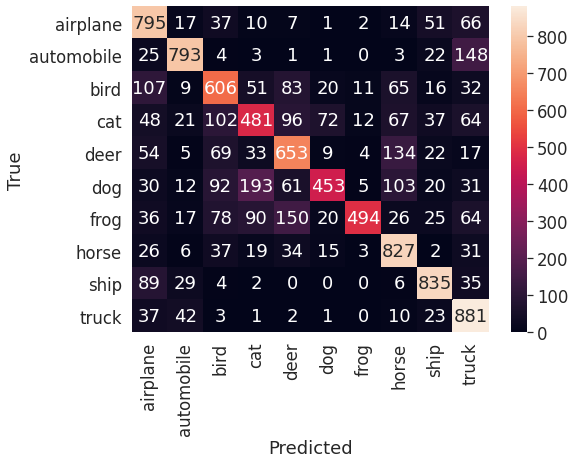

In [ ]:
from sklearn.metrics import confusion_matrix

# predict
y_pred2 = model2.predict(X_test)
y_pred2_labels = np.argmax(y_pred2, axis=1)
y_true_labels = y_test
conf_matrix2 = confusion_matrix(y_true_labels, y_pred2_labels)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(conf_matrix2, xticklabels=class_names, yticklabels=class_names,
            annot=True, fmt="d");
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show();

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true_labels, y_pred2_labels,
                            target_names=class_names, digits=4))

              precision    recall  f1-score   support

    airplane     0.6375    0.7950    0.7076      1000
  automobile     0.8339    0.7930    0.8129      1000
        bird     0.5872    0.6060    0.5965      1000
         cat     0.5447    0.4810    0.5109      1000
        deer     0.6007    0.6530    0.6258      1000
         dog     0.7652    0.4530    0.5691      1000
        frog     0.9303    0.4940    0.6453      1000
       horse     0.6590    0.8270    0.7335      1000
        ship     0.7930    0.8350    0.8134      1000
       truck     0.6435    0.8810    0.7438      1000

    accuracy                         0.6818     10000
   macro avg     0.6995    0.6818    0.6759     10000
weighted avg     0.6995    0.6818    0.6759     10000



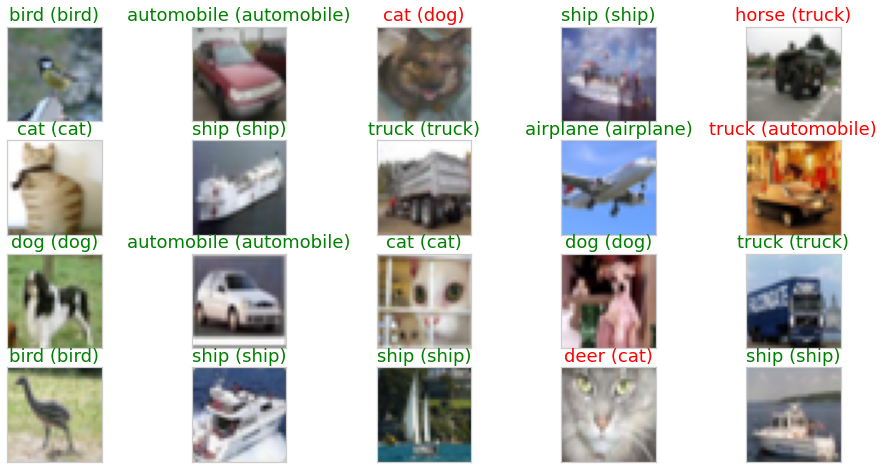

In [ ]:
np.random.seed(42)
plot_pred_result(X_test, y_test, y_pred2)

From the confusion matrix and classification report, we notice the following:

- The confusion matrix looks pretty good, especially for the vehicle classes (airplane, automobile, ship and truck) and horse class.
- CNN seems to perform relatively worse in prediction of most animal classes, especially dog and cat classes.

- Both the classification accuracy and F1 score are about 68-69%. This can be dramatically improved by adding more convolutional layers.
- The F1 score of cat and dog classes are among the lowest, which is expected.

The `plot_pred_result` function displays 20 images with the associated predicted and true labels on top of each image, where the true label is stated inside the parenthesis. The correctly classified will have a green label, whereas the wrongly classified will have a red label.

It is noticed that animals are usually mistaken for another types of animal, whereas vehicles are usually mistaken for another types of vehicles. Alos, dogs and cats are often confused for one another.

### 4. Comparison & Summary <a class="anchor" id="4"></a>

A comprehensive comparision and discussion on the classification accuracy between MLP and CNN will be provided at the end of this section.

The test accuracy of MLP and CNN, side-by-side plot of confusion matrices, and plot of classified images from ship and dog classes are shown as follows:

In [ ]:
# test accuracy
from sklearn.metrics import accuracy_score

print('MLP accuracy =', accuracy_score(y_true_labels, y_pred_labels))
print('CNN accuracy =', accuracy_score(y_true_labels, y_pred2_labels))

MLP accuracy = 0.4392
CNN accuracy = 0.6818


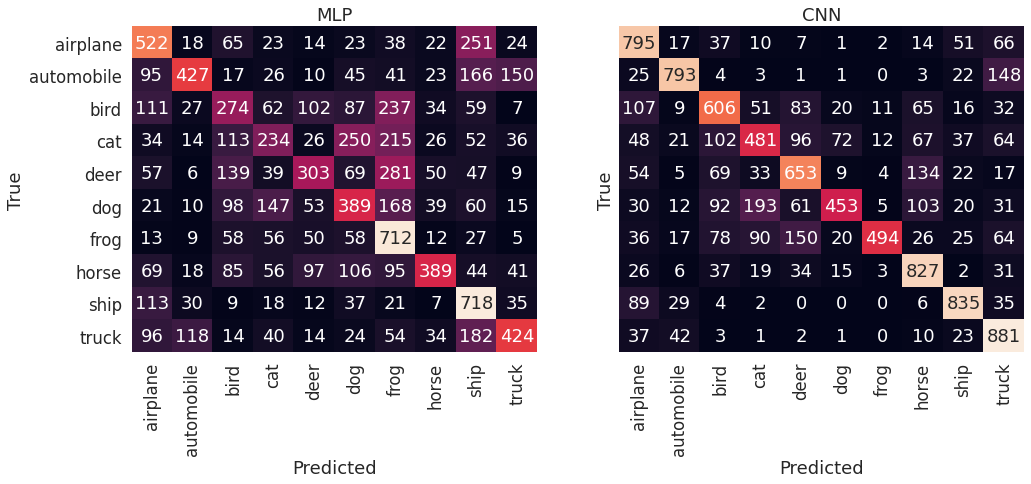

In [ ]:
# plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names,
            annot=True, fmt="d", ax=axes[0], cbar=False)
axes[0].set_title('MLP')
axes[0].set_ylabel('True')
axes[0].set_xlabel('Predicted')
sns.heatmap(conf_matrix2, xticklabels=class_names, yticklabels=False,
            annot=True, fmt="d", ax=axes[1], cbar=False)
axes[1].set_title('CNN')
axes[1].set_ylabel('True')
axes[1].set_xlabel('Predicted')
plt.show();

In [ ]:
def plot_pred_class(X_test, y_test, y_pred, class_idx):
    index = np.where(y_test == class_idx)
    X_class = X_test[index]
    y_class = y_test[index]
    y_pred_class = y_pred[index]
    fig = plt.figure(figsize = (16, 8))
    for i, idx in enumerate(np.random.choice(X_class.shape[0], size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_class[idx]))
        pred_idx = np.argmax(y_pred_class[idx])
        true_idx = y_class[idx]
        ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

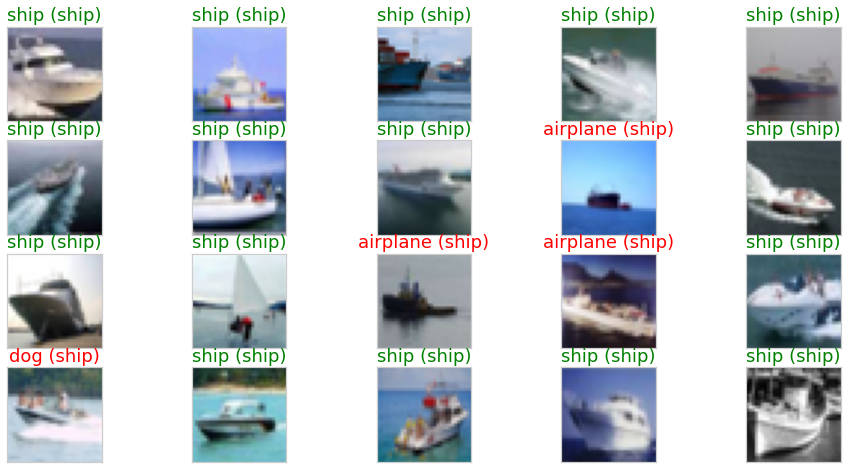

In [ ]:
# Plot ship class as predicted by MLP
np.random.seed(42)
plot_pred_class(X_test, y_test, y_pred, 8)

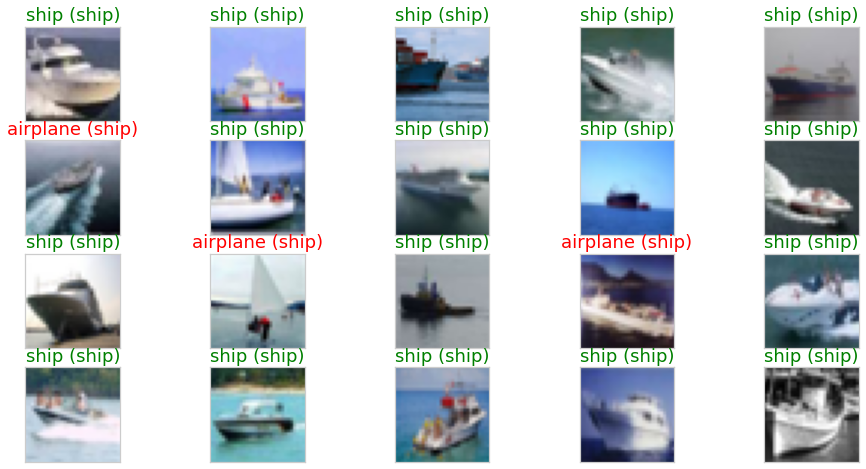

In [ ]:
# Plot ship class as predicted by CNN
np.random.seed(42)
plot_pred_class(X_test, y_test, y_pred2, 8)

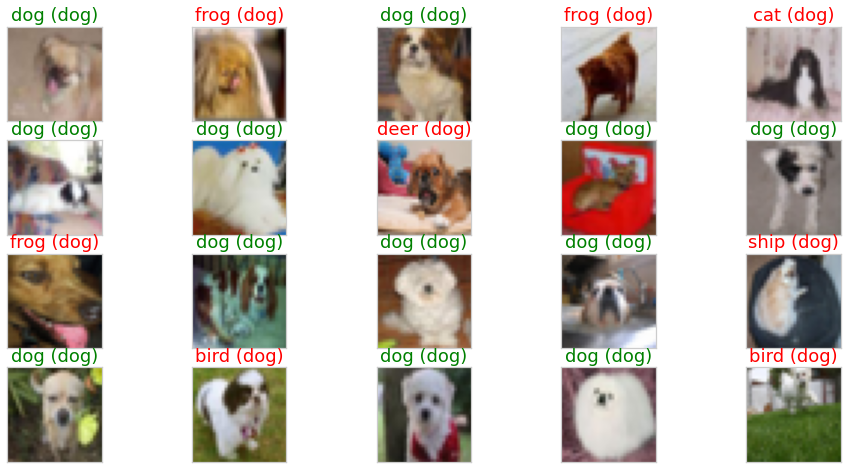

In [ ]:
# Plot dog class as predicted by MLP
np.random.seed(42)
plot_pred_class(X_test, y_test, y_pred, 5)

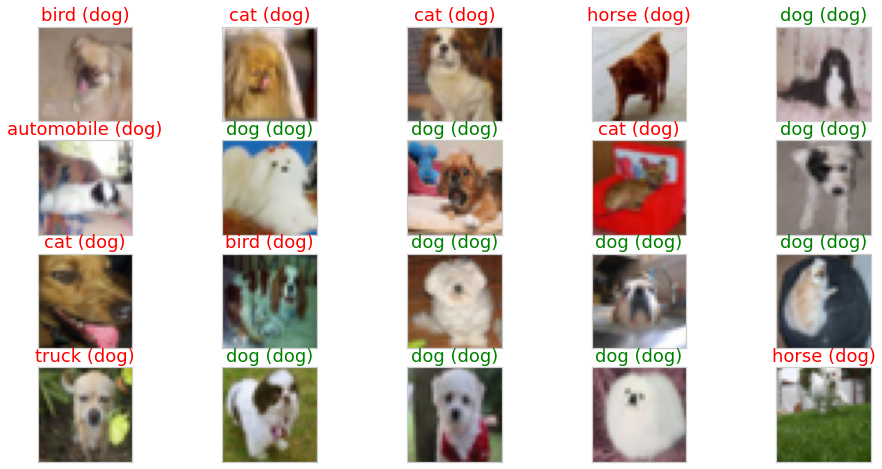

In [ ]:
# Plot dog class as predicted by CNN
np.random.seed(42)
plot_pred_class(X_test, y_test, y_pred2, 5)

From the above outputs, we notice the following:

- The test accuracy of MLP and CNN are 44% and 68%, respectively. A 24% difference in accuracy is quite large but expected, since CNN is known for being extremely efficient in image processing as compared to MLP. 
- There are a few reasons why CNNs are more suitable for image processing:
  - CNNs make use of predefined convolving filters, which can be effectively identify patterns in images and detect edges.
  - The convolution layer architecture takes advantage of local spatial coherence in the input, which cut down the number of parameters by sharing weight.
  - Making use of pooling layers has significantly reduced the number of parameters, while conserving enough information.
- The accuracy of CNN can still be improved by adding more convolution layers and/or using different optimizer.
- From the confusion matrices, the class where both MLP and CNN seem to perform well is the ship class. On the other hand, the class where both MLP and CNN seem to incorrectly classified is the dog class. In order to observe the classified image from these classes, the function `plot_pred_class` is defined with three arguments: `X_test`, `y_test`, `y_pred` and `class_idx`. The first three arguments are self-explaining, whereas  `class_index` takes in integer index corresponding to each class (0 to 9).
- Overall, both MLP and CNN perform significantly worse in prediction of the animal classes than the vehicle classes. This worse prediction in animal classes is due to the images were taken from many different angles and poses. In addition, each of the animal class are of many different types, species, and colours.
- Four-legged animals, especially cats and dogs, are often mistaken for one another.
- By observing the classified images, dogs are usually misclassified when legs are not visible in the image or other unwanted objects (e.g. floor, toys, dog bed, etc.) are clearly visible.
- For this lab, grid searching and training of both MLP and CNN are possible using free GPU provided by Google Colab. Also, colab also provide executed code history, which we can observed usage and runtime of the code cell.
- The training time for MLP and CNN are aprroximately 6 and 8 minutes, respectively. Since CNN has higher model complexity due to the existing of convolutional layers, pooling layers, and batch normalisation layers, lots extra computations is required. Hence, longer runtime is observed for the training of CNN.